In [2]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import sklearn as sk
import matplotlib
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)

Using TensorFlow backend.


In [3]:
path_to_save = "../results/Figures/Supplemental Figure 11/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [4]:
data = sc.read("../data/MouseAtlas.subset.h5ad")
data

AnnData object with n_obs × n_vars = 114600 × 2797 
    obs: 'Organ', 'n_genes', 'n_counts', 'sample', 'louvain', 'summary2', 'batch', 'organ_sample', 'cnk', 'smp_org', 'chk', 'summary1', 'Organ groups', 'organ groups', 'cell types', 'Dataset', 'Cell types', 'Hox_genes'
    var: 'GeneName', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Cell types_colors', 'Dataset_colors', 'Organ groups_colors', 'cell types_colors', 'idx', 'louvain', 'louvain_colors', 'neighbors', 'organ groups_colors', 'pca', 'rank_genes_groups', 'sample_color', 'sample_colors', 'summary1_colors', 'summary2_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_3D'
    varm: 'PCs'

saving figure to file ../results/Figures/Supplemental Figure 11/umaporig_mouse_datasets.png


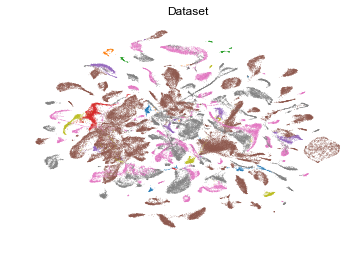

saving figure to file ../results/Figures/Supplemental Figure 11/umaporig_mouse_Cell types.png


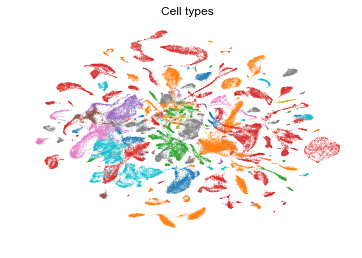

saving figure to file ../results/Figures/Supplemental Figure 11/umaporig_mouse_Organ groups.png


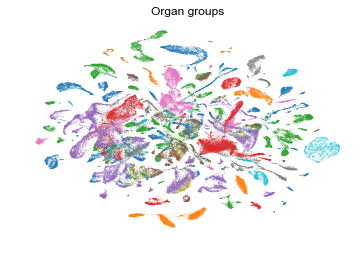

In [5]:
sc.pp.pca(data, svd_solver="arpack")
sc.pp.neighbors(data, n_neighbors=25)
sc.tl.umap(data)
sc.pl.umap(data, legend_loc=False, palette=matplotlib.rcParams["axes.prop_cycle"], color=['Dataset'], save="orig_mouse_datasets.png", frameon=False, show=True)
sc.pl.umap(data, legend_loc=False, palette=matplotlib.rcParams["axes.prop_cycle"], color=['Cell types'], save="orig_mouse_Cell types.png", frameon=False, show=True)
sc.pl.umap(data, legend_loc=False, palette=matplotlib.rcParams["axes.prop_cycle"], color=['Organ groups'], save="orig_mouse_Organ groups.png", frameon=False, show=True)

In [6]:
X_pca = data.obsm["X_pca"]
labels = data.obs["Dataset"].tolist()
print(f"average silhouette_score for original mouse :{sk.metrics.silhouette_score(X_pca,labels,sample_size=57300, random_state=2)}")

average silhouette_score for original mouse :-0.2386959046125412


In [7]:
%%bash
python ../code/mouse_atlas.py

Initial run
Model saved in file: ../models/mouse_atlas/scgen
total number of trained epochs is 1
B cell
Embryonic/Fetal/Neonatal cell
Endothelial
Epithelial
Erythrocyte
Hematopoietic stem cell
Megakaryocyte
Mesenchymal cell
Muscle
Myeloid cell
NK cell
Neuron/glial cell
Smooth muscle
T cell


2019-04-10 11:29:44.257182: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [8]:
corrected_mouse_atlas = sc.read("../data/reconstructed/scGen/mouse_atlas.h5ad")
corrected_mouse_atlas

AnnData object with n_obs × n_vars = 114600 × 2797 
    obs: 'cell_type', 'Dataset', 'Organ groups'

saving figure to file ../results/Figures/Supplemental Figure 11/umapcorrected_mouse_datasets_dsm.png


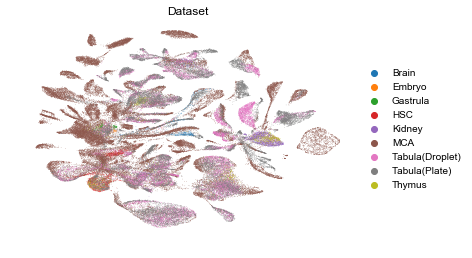

saving figure to file ../results/Figures/Supplemental Figure 11/umapcorrected_mouse_Cell types_dsm.png


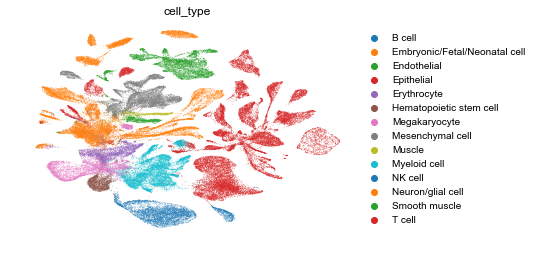

saving figure to file ../results/Figures/Supplemental Figure 11/umapcorrected_mouse_Organ groups_dsm.png


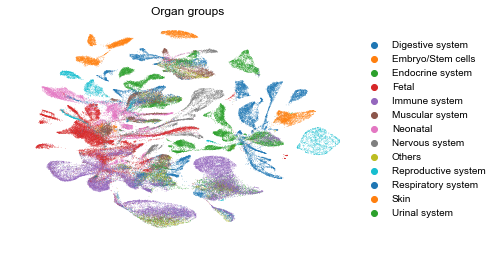

In [9]:
sc.pp.pca(corrected_mouse_atlas, svd_solver="arpack")
sc.pp.neighbors(corrected_mouse_atlas, n_neighbors=25)
sc.tl.umap(corrected_mouse_atlas)
sc.pl.umap(corrected_mouse_atlas, palette=matplotlib.rcParams["axes.prop_cycle"], color=['Dataset'], save="corrected_mouse_datasets_dsm.png",
           frameon=False, show=True)
sc.pl.umap(corrected_mouse_atlas, palette=matplotlib.rcParams["axes.prop_cycle"], color=['cell_type'], save="corrected_mouse_Cell types_dsm.png",
           frameon=False, show=True)
sc.pl.umap(corrected_mouse_atlas, palette=matplotlib.rcParams["axes.prop_cycle"], color=['Organ groups'], save="corrected_mouse_Organ groups_dsm.png",
           frameon=False, show=True)

In [10]:
X_pca = corrected_mouse_atlas.obsm["X_pca"]
labels2 = corrected_mouse_atlas.obs["Dataset"].tolist()
print(f"average silhouette_score for scGen :{sk.metrics.silhouette_score(X_pca,labels2,sample_size=57300, random_state=2)}")

average silhouette_score for scGen :-0.2864978611469269
